### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem
import scipy.stats as st


In [65]:
# File to Load (Remember to Change These)
file_to_load = "Resources/NCOV_COVID_Cases_by_Age_Group_20210921.csv"

# Read Purchasing File and store into Pandas data frame
covid_agegroup_df = pd.read_csv(file_to_load)


In [66]:
#covid_agegroup_df["agegroup"].replace("10-19_", "10-19", regex=True)
covid_agegroup_df["agegroup"].unique()

array(['20-29', '60-69', '70-79', '30-39', '40-49', '50-59', '10-19_',
       '80-89', '0-9', '90+'], dtype=object)

In [67]:
covid_agegroup_df["agegroup"].replace({"10-19_" : "10-19"}, inplace = True)
print(covid_agegroup_df)

      diagnosis_date agegroup
0         11/03/2020    20-29
1          8/03/2020    60-69
2          9/03/2020    70-79
3          1/08/2020    30-39
4          1/03/2020    30-39
...              ...      ...
29591     20/09/2021    20-29
29592     20/09/2021    30-39
29593     20/09/2021    20-29
29594     20/09/2021    40-49
29595     20/09/2021    20-29

[29596 rows x 2 columns]


In [68]:
covid_agegroup_df["agegroup"].unique()

array(['20-29', '60-69', '70-79', '30-39', '40-49', '50-59', '10-19',
       '80-89', '0-9', '90+'], dtype=object)

## Victoria COVID - 19 Cases by Age Group

Diagnosis period (25/1/20 - 19/9/21)

In [69]:
#Date format
covid_agegroup_df["diagnosis_date"]= pd.to_datetime(covid_agegroup_df["diagnosis_date"],dayfirst=True)

In [70]:
covid_agegroup_df.sort_values("diagnosis_date", ascending=True)


,diagnosis_date,agegroup
16849,2020-01-25,50-59
5,2020-01-28,60-69
6,2020-01-30,40-49
7,2020-01-31,20-29
16861,2020-02-22,60-69
...,...,...
28771,2021-09-20,60-69
28775,2021-09-20,0-9
28799,2021-09-20,10-19
28738,2021-09-20,10-19


In [71]:
totaL_covid_cases = covid_agegroup_df["diagnosis_date"].count()
totaL_covid_cases

29596

In [72]:
age_bracket = covid_agegroup_df.groupby(["agegroup"]).count()
age_bracket

,diagnosis_date
agegroup,
0-9,2580
10-19,3583
20-29,6954
30-39,5258
40-49,3603
50-59,2986
60-69,1669
70-79,1058
80-89,1150


In [73]:
age_range = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90+"]
infection_no = [2580, 3583, 6954, 5258, 3603, 2986, 1669, 1058, 1150, 755]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "pink", "purple", "gold", "white", "orange"]



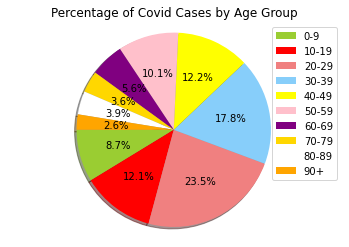

In [74]:
plt.title("Percentage of Covid Cases by Age Group")
plt.pie(infection_no, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.legend (age_range, loc="upper right")
plt.show()

## Population of Victoria vs COVID cases

Population of Victoria March 21 2021- 6,648,564 
Total covid cases - 29008

In [75]:
total = ["infected","non-infection"] 
population = [29596, 6618968]
colors = ["red", "green"]

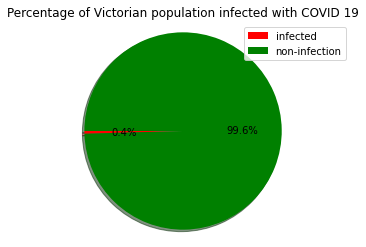

In [76]:
plt.title("Percentage of Victorian population infected with COVID 19")
plt.pie(population, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.legend (total, loc="upper right")
plt.show()

In [77]:
under_ten_df = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "0-9"]
under_ten_df

,diagnosis_date,agegroup
483,2020-04-02,0-9
509,2020-04-02,0-9
622,2020-05-12,0-9
641,2020-04-04,0-9
754,2020-06-13,0-9
...,...,...
29543,2021-09-20,0-9
29553,2021-09-20,0-9
29556,2021-09-20,0-9
29566,2021-09-20,0-9


In [78]:
#under_ten_df["count"]=under_ten_df.groupby(["diagnosis_date"]).transform("count")["agegroup"]
#under_ten_df

In [79]:
underten = under_ten_df.groupby(["diagnosis_date"]).count()
underten

,agegroup
diagnosis_date,
2020-03-23,1
2020-03-30,5
2020-04-01,2
2020-04-02,2
2020-04-04,2
...,...
2021-09-16,82
2021-09-17,68
2021-09-18,76


In [80]:
underten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2020-03-23 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  239 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [81]:
# p=underten.index.values
# underten_df=underten.insert(0,column='diagnosis_date',value=p)
# n_underten_df=underten_df

In [82]:
#underten_df=underten
p=underten.index.values
underten.insert(0,column='diagnosis_date',value=p)

In [83]:
underten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2020-03-23 to 2021-09-20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   diagnosis_date  239 non-null    datetime64[ns]
 1   agegroup        239 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


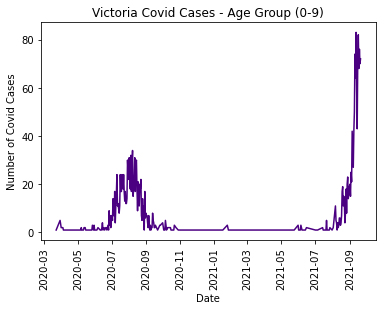

In [85]:
plt.plot(underten.iloc[:,0],underten.iloc[:,1],color="indigo", label="Under TEN years old")
plt.title("Victoria Covid Cases - Age Group (0-9)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.xticks(rotation=90)
plt.show()


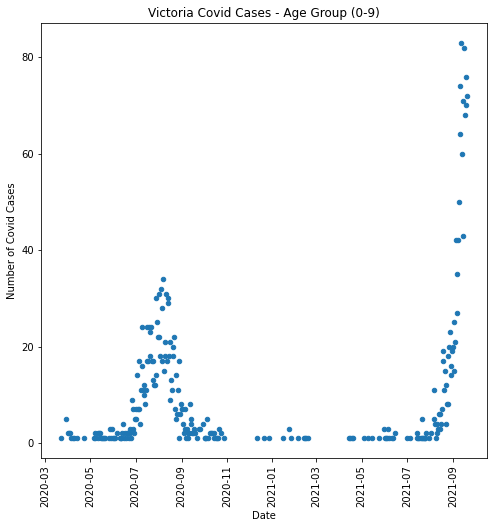

In [86]:
# Create a scatter date versus ages from 0-9 with covid  
underten.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (0-9)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")              
plt.xticks(rotation=90)
plt.show()

In [87]:
under_twenty = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "10-19"]
under_twenty

,diagnosis_date,agegroup
25,2020-03-19,10-19
26,2020-03-19,10-19
52,2020-03-17,10-19
87,2020-03-22,10-19
122,2020-03-22,10-19
...,...,...
29532,2021-09-20,10-19
29540,2021-09-20,10-19
29555,2021-09-20,10-19
29570,2021-09-20,10-19


In [88]:
undertwenty = under_twenty.groupby(["diagnosis_date"]).count()
undertwenty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-03-14 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  254 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [89]:
p=undertwenty.index.values
undertwenty.insert(0,column='diagnosis_date',value=p)

In [90]:
undertwenty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-03-14 to 2021-09-20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   diagnosis_date  254 non-null    datetime64[ns]
 1   agegroup        254 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.0 KB


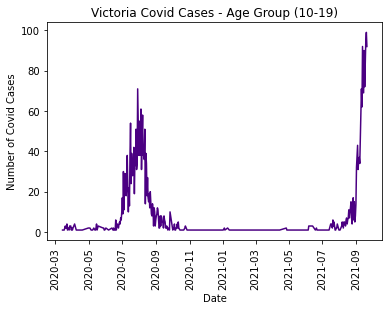

In [91]:
#Plot line graph date versus ages from 10-19 with covid 
plt.plot(undertwenty.iloc[:,0],undertwenty.iloc[:,1],color="indigo", label="Under TWENTY years old")
plt.title("Victoria Covid Cases - Age Group (10-19)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.xticks(rotation=90)
plt.show()



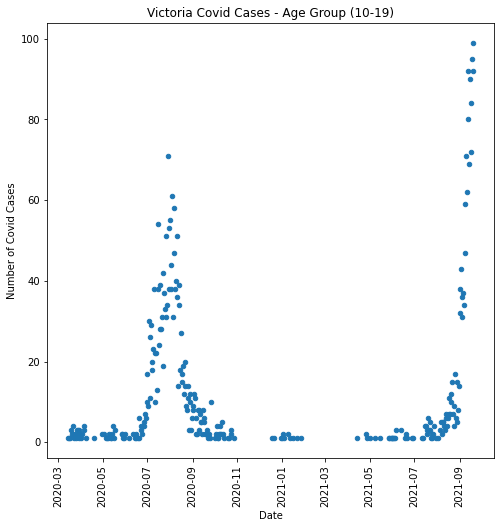

In [92]:
# Create a scatter date versus ages from 10-19 with covid  
undertwenty.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (10-19)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")              
plt.xticks(rotation=90)
plt.show()

In [93]:
twenties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "20-29"]
twenties

,diagnosis_date,agegroup
0,2020-03-11,20-29
7,2020-01-31,20-29
27,2020-03-21,20-29
33,2020-03-13,20-29
35,2020-03-12,20-29
...,...,...
29588,2021-09-20,20-29
29589,2021-09-20,20-29
29591,2021-09-20,20-29
29593,2021-09-20,20-29


In [94]:
twentygrp =twenties.groupby(["diagnosis_date"]).count()
twentygrp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2020-01-31 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  330 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [95]:
p=twentygrp.index.values
twentygrp.insert(0,column='diagnosis_date',value=p)

In [96]:
twentygrp

,diagnosis_date,agegroup
diagnosis_date,,
2020-01-31,2020-01-31,1
2020-02-22,2020-02-22,1
2020-03-09,2020-03-09,1
2020-03-11,2020-03-11,1
2020-03-12,2020-03-12,2
...,...,...
2021-09-16,2021-09-16,117
2021-09-17,2021-09-17,116
2021-09-18,2021-09-18,124


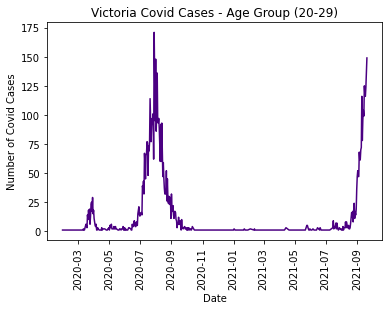

In [97]:
#Plot line graph date versus ages from 20-29 with covid 
plt.plot(twentygrp.iloc[:,0],twentygrp.iloc[:,1],color="indigo", label="20-29 years old")
plt.title("Victoria Covid Cases - Age Group (20-29)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.xticks(rotation=90)
plt.show()

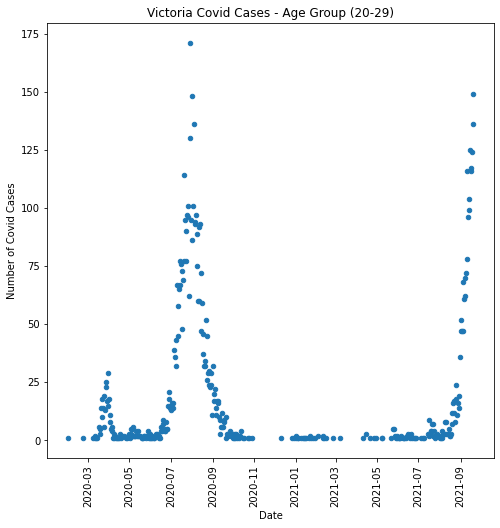

In [98]:
# Create a scatter date versus ages from 20-29 with covid  
twentygrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 20-29 with covid ")
plt.title("Victoria Covid Cases - Age Group (20-29)")             
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.xticks(rotation=90)
plt.show()

In [99]:
thirties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "30-39"]
thirties

,diagnosis_date,agegroup
3,2020-08-01,30-39
4,2020-03-01,30-39
10,2020-03-13,30-39
15,2020-03-04,30-39
17,2020-03-14,30-39
...,...,...
29576,2021-09-20,30-39
29578,2021-09-20,30-39
29580,2021-09-20,30-39
29586,2021-09-20,30-39


In [100]:
thirtiesgrp =thirties.groupby(["diagnosis_date"]).count()
thirtiesgrp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 2020-03-01 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  317 non-null    int64
dtypes: int64(1)
memory usage: 5.0 KB


In [101]:
# thirtiesgrp_df=thirtiesgrp.cumsum()
# thirtiesgrp_df

In [102]:
p=thirtiesgrp.index.values
thirtiesgrp.insert(0,column='diagnosis_date',value=p)

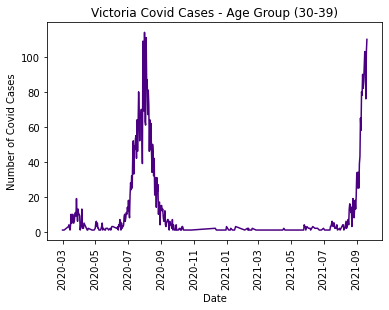

In [138]:
#Plot line graph date versus ages from 30-39 with covid 
plt.plot(thirtiesgrp.iloc[:,0],thirtiesgrp.iloc[:,1],color="indigo", label="30-39 years old")
plt.xticks(rotation=90)
plt.title("Victoria Covid Cases - Age Group (30-39)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.show()

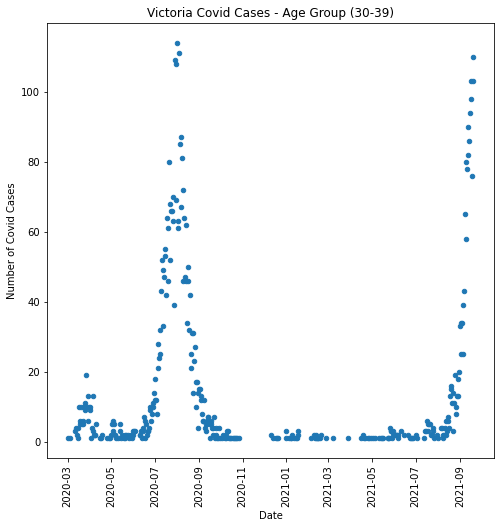

In [104]:
# Create a scatter date versus ages from 30-39 with covid  
thirtiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (30-39)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.xticks(rotation=90)
plt.show()

In [105]:
forties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "40-49"]
forties

,diagnosis_date,agegroup
6,2020-01-30,40-49
9,2020-03-15,40-49
12,2020-03-13,40-49
13,2020-03-11,40-49
16,2020-03-13,40-49
...,...,...
29558,2021-09-20,40-49
29562,2021-09-20,40-49
29567,2021-09-20,40-49
29583,2021-09-20,40-49


In [106]:
fortiesgrp =forties.groupby(["diagnosis_date"]).count()
fortiesgrp

,agegroup
diagnosis_date,
2020-01-30,1
2020-03-11,2
2020-03-12,1
2020-03-13,2
2020-03-15,5
...,...
2021-09-16,55
2021-09-17,67
2021-09-18,52


In [107]:
p=fortiesgrp.index.values
fortiesgrp.insert(0,column='diagnosis_date',value=p)

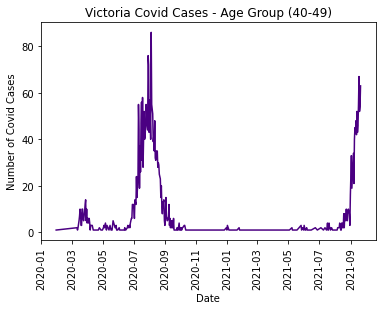

In [108]:
#Plot line graph date versus ages from 40-49 with covid 
plt.plot(fortiesgrp.iloc[:,0],fortiesgrp.iloc[:,1],color="indigo", label="40-49 years old")
plt.xticks(rotation=90)
plt.title("Victoria Covid Cases - Age Group (40-49)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.show()

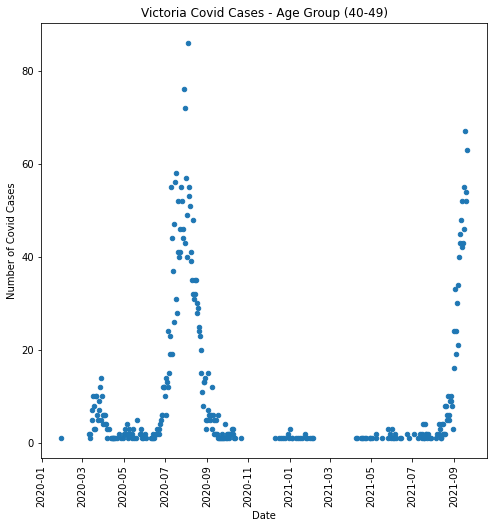

In [109]:
# Create a scatter date versus ages from 40-49 with covid  
fortiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (40-49)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")              
plt.xticks(rotation=90)
plt.show()

In [110]:
# fortiesgrp.sort_values("diagnosis_date", ascending=True)
# fortiesgrp_df=fortiesgrp.cumsum()
# fortiesgrp_df

In [111]:
fifty = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "50-59"]
fifty.head()

,diagnosis_date,agegroup
8,2020-03-11,50-59
14,2020-03-13,50-59
36,2020-03-12,50-59
37,2020-04-06,50-59
40,2020-03-10,50-59


In [112]:
fiftygrp =fifty.groupby(["diagnosis_date"]).count()
fiftygrp

,agegroup
diagnosis_date,
2020-01-25,1
2020-03-07,1
2020-03-08,1
2020-03-09,1
2020-03-10,2
...,...
2021-09-16,54
2021-09-17,52
2021-09-18,51


In [113]:
p=fiftygrp.index.values
fiftygrp.insert(0,column='diagnosis_date',value=p)

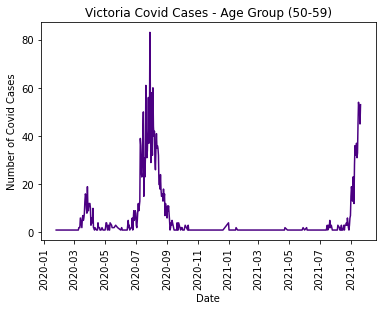

In [114]:
#Plot line graph date versus ages from 50-59 with covid 
plt.plot(fiftygrp.iloc[:,0],fiftygrp.iloc[:,1],color="indigo", label="50-59 years old")
plt.xticks(rotation=90)
plt.title("Victoria Covid Cases - Age Group (50-59)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.show()

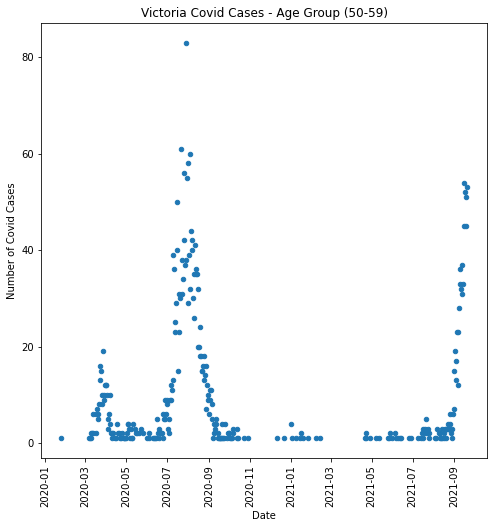

In [115]:
# Create a scatter date versus ages from 50-59 with covid  
fiftygrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (50-59)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")              
plt.xticks(rotation=90)
plt.show()

In [116]:
sixties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "60-69"]
sixties 

,diagnosis_date,agegroup
1,2020-03-08,60-69
5,2020-01-28,60-69
11,2020-03-13,60-69
18,2020-03-13,60-69
23,2020-03-19,60-69
...,...,...
29547,2021-09-20,60-69
29548,2021-09-20,60-69
29564,2021-09-20,60-69
29581,2021-09-20,60-69


In [117]:
sixtiesgrp =sixties.groupby(["diagnosis_date"]).count()
sixtiesgrp

,agegroup
diagnosis_date,
2020-01-28,1
2020-02-22,1
2020-02-25,1
2020-03-08,1
2020-03-12,2
...,...
2021-09-16,16
2021-09-17,21
2021-09-18,12


In [118]:
p=sixtiesgrp.index.values
sixtiesgrp.insert(0,column='diagnosis_date',value=p)

In [119]:
sixtiesgrp

,diagnosis_date,agegroup
diagnosis_date,,
2020-01-28,2020-01-28,1
2020-02-22,2020-02-22,1
2020-02-25,2020-02-25,1
2020-03-08,2020-03-08,1
2020-03-12,2020-03-12,2
...,...,...
2021-09-16,2021-09-16,16
2021-09-17,2021-09-17,21
2021-09-18,2021-09-18,12


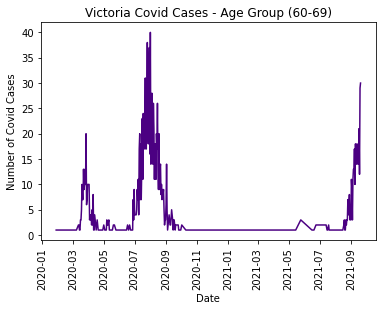

In [120]:
#Plot line graph date versus ages from 60-69 with covid 
plt.plot(sixtiesgrp.iloc[:,0],sixtiesgrp.iloc[:,1],color="indigo", label="60-69 years old")
plt.xticks(rotation=90)
plt.title("Victoria Covid Cases - Age Group (60-69)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.show()

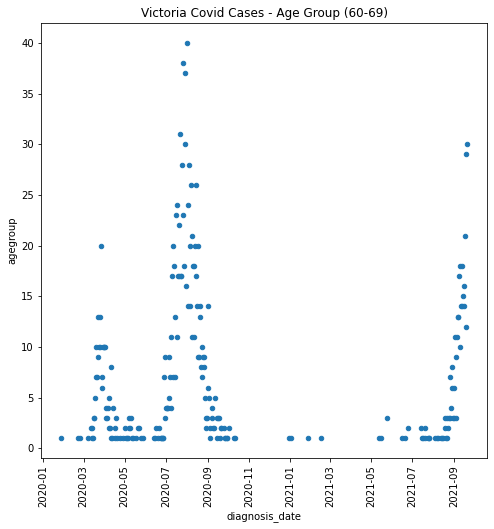

In [121]:
# Create a scatter date versus ages from 60-69 with covid  
sixtiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (60-69)")
plt.xticks(rotation=90)
plt.show()

In [122]:
seventies = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "70-79"]
seventies 

,diagnosis_date,agegroup
2,2020-03-09,70-79
21,2020-03-06,70-79
79,2020-03-21,70-79
131,2020-03-22,70-79
145,2020-03-25,70-79
...,...,...
29508,2021-09-20,70-79
29533,2021-09-20,70-79
29550,2021-09-20,70-79
29574,2021-09-20,70-79


In [123]:
seventiesgrp = seventies.groupby(["diagnosis_date"]).count()
seventiesgrp

,agegroup
diagnosis_date,
2020-03-01,1
2020-03-06,1
2020-03-09,1
2020-03-17,1
2020-03-19,3
...,...
2021-09-16,9
2021-09-17,7
2021-09-18,9


In [124]:
p=seventiesgrp.index.values
seventiesgrp.insert(0,column='diagnosis_date',value=p)

In [125]:
seventiesgrp

,diagnosis_date,agegroup
diagnosis_date,,
2020-03-01,2020-03-01,1
2020-03-06,2020-03-06,1
2020-03-09,2020-03-09,1
2020-03-17,2020-03-17,1
2020-03-19,2020-03-19,3
...,...,...
2021-09-16,2021-09-16,9
2021-09-17,2021-09-17,7
2021-09-18,2021-09-18,9


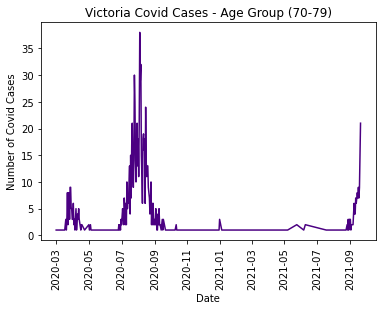

In [126]:
#Plot line graph date versus ages from 70-79 with covid 
plt.plot(seventiesgrp.iloc[:,0],seventiesgrp.iloc[:,1],color="indigo", label="70-79 years old")
plt.xticks(rotation=90)
plt.title("Victoria Covid Cases - Age Group (70-79)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.show()

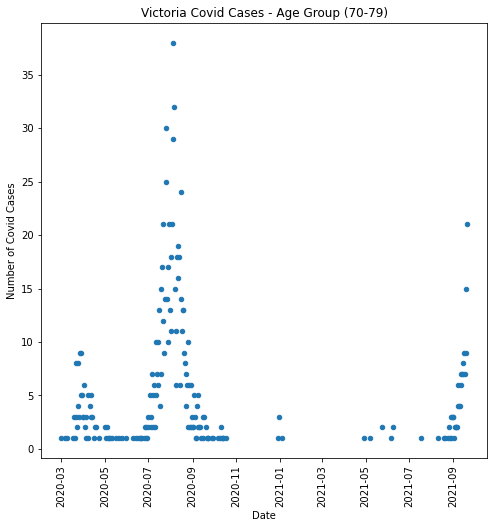

In [127]:
# Create a scatter date versus ages from 70-79 with covid  
seventiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (70-79)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")              
plt.xticks(rotation=90)
plt.show()

In [128]:
eighties= covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "80-89"]
eighties

,diagnosis_date,agegroup
90,2020-03-21,80-89
207,2020-03-23,80-89
220,2020-03-22,80-89
295,2020-03-28,80-89
326,2020-03-22,80-89
...,...,...
29323,2021-09-20,80-89
29492,2021-09-20,80-89
29541,2021-09-20,80-89
29565,2021-09-20,80-89


In [129]:
eightiesgrp = eighties.groupby(["diagnosis_date"]).count()
eightiesgrp

,agegroup
diagnosis_date,
2020-03-21,1
2020-03-22,2
2020-03-23,1
2020-03-24,1
2020-03-25,1
...,...
2021-09-16,3
2021-09-17,5
2021-09-18,3


In [130]:
p=eightiesgrp.index.values
eightiesgrp.insert(0,column='diagnosis_date',value=p)

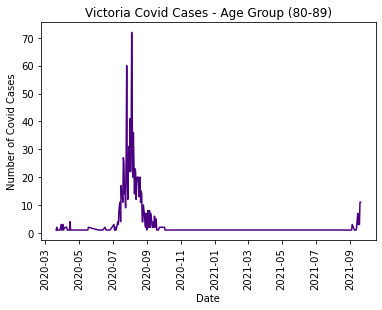

In [131]:
#Plot line graph date versus ages from 80-89 with covid 
plt.plot(eightiesgrp.iloc[:,0],eightiesgrp.iloc[:,1],color="indigo", label="80-89 years old")
plt.xticks(rotation=90)
plt.title("Victoria Covid Cases - Age Group (80-89)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.show()

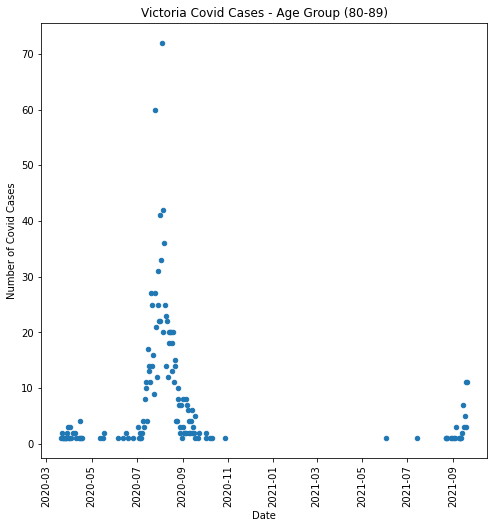

In [132]:
# Create a scatter date versus ages from 80-89 with covid  
eightiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (80-89)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")              
plt.xticks(rotation=90)
plt.show()

In [133]:
nineties= covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "90+"]
nineties 

,diagnosis_date,agegroup
926,2020-07-27,90+
974,2020-08-13,90+
1006,2020-06-07,90+
1078,2020-08-01,90+
1094,2020-08-03,90+
...,...,...
28562,2021-09-18,90+
28596,2021-09-18,90+
28988,2021-09-20,90+
29111,2021-09-19,90+


In [134]:
ninetiesgrp = nineties.groupby(["diagnosis_date"]).count()
ninetiesgrp

,agegroup
diagnosis_date,
2020-03-31,1
2020-04-07,1
2020-04-18,1
2020-04-27,1
2020-04-29,2
...,...
2021-09-14,1
2021-09-15,1
2021-09-18,2


In [135]:
p=ninetiesgrp.index.values
ninetiesgrp.insert(0,column='diagnosis_date',value=p)

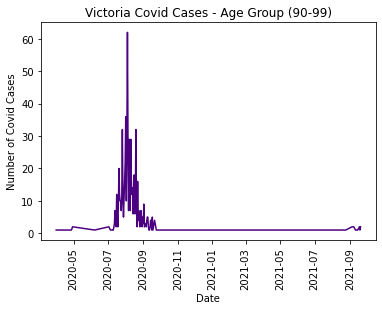

In [136]:
#Plot line graph date versus ages from 90-99 with covid 
plt.plot(ninetiesgrp.iloc[:,0],ninetiesgrp.iloc[:,1],color="indigo", label="90-99 years old")
plt.title("Victoria Covid Cases - Age Group (90-99)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")
plt.xticks(rotation=90)
plt.show()

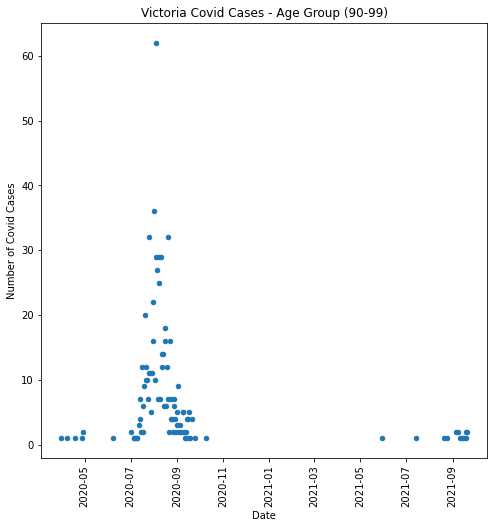

In [137]:
# Create a scatter date versus ages from 90-99 with covid  
ninetiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="Victoria Covid Cases - Age Group (90-99)")
plt.xlabel("Date")
plt.ylabel("Number of Covid Cases")             
plt.xticks(rotation=90)
plt.show()